In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
import functools

import os

In [2]:
os.listdir("./data")

['g1000p3_EUR.tar.gz',
 '.DS_Store',
 'analysis',
 'metcca_results_pBonf_sig.txt',
 'missing_snps.txt',
 'g1000p3_EUR',
 'metacca_results.txt',
 'metcca_results_all_pBonf.txt',
 'plink_data',
 'processed',
 'raw',
 'magma_data']

In [3]:
os.listdir("./data/processed")

['annotated_lookup.annot',
 'for_gene_annot.txt',
 'sxy_study_1_maf1_pruned_singlehg19genes.txt',
 '.DS_Store',
 'syy_full_study_1.txt',
 'rsids.txt',
 'sxy_full_study_1.txt',
 'annotated_lookup_singlehg19genes.txt',
 'sxy_study_1_maf1_pruned.txt',
 'sxy_study_1_maf1.txt',
 'for_gene_annot_noheader.txt',
 'annotated_lookup.log',
 'maf1_data_pruned.vcf',
 'maf1_data.vcf',
 'for_gene_annot_header.txt']

In [4]:
if not os.path.isdir("./data/analysis"):
    os.mkdir("./data/analysis")

In [5]:
sig_df = pd.read_csv("./data/metcca_results_pBonf_sig.txt", delimiter=" ")
print(sig_df.shape)
sig_df.head()

(860, 11)


,no_SNPs,SNPs,no_PTs,PTs,r_1,pval_minuslog10,pval,genes,chrom,pval_num,pBonf
0,401,rs2077774_rs115664155_rs77380012_rs1683348_rs1...,3,SYS_DIA_PUL,0.099205,inf,0.0,FHIT,3,0.0,0.0
1,871,rs55958324_rs11985528_rs2291319_rs186685133_rs...,3,SYS_DIA_PUL,0.815643,inf,0.0,CSMD1,8,0.0,0.0
2,563,rs117691743_rs13294162_rs7044877_rs6477292_rs7...,3,SYS_DIA_PUL,0.295391,inf,0.0,PTPRD,9,0.0,0.0
3,587,rs4786804_rs12927365_rs7185884_rs541938268_rs1...,3,SYS_DIA_PUL,0.394163,inf,0.0,RBFOX1,16,0.0,0.0
4,422,rs7192129_rs77002264_rs8045088_rs74508589_rs11...,3,SYS_DIA_PUL,0.096693,inf,0.0,WWOX,16,0.0,0.0


In [63]:
all_df = pd.read_csv("./data/metcca_results_all_pBonf.txt", delimiter=" ")
all_df.loc[all_df['pBonf'] == 0, 'pBonf'] = 10**-300
all_df['pbonf_minuslog10'] = -np.log10(all_df['pBonf'])
all_df.head()

,no_SNPs,SNPs,no_PTs,PTs,r_1,pval_minuslog10,pval,genes,chrom,pval_num,pBonf,pbonf_minuslog10
0,4,rs12748548_rs12029239_rs1204682_rs656801,3,SYS_DIA_PUL,0.028799,60.071975,8.472754e-61,CD34,1,8.472754e-61,1.287096e-56,55.890389
1,202,rs74146692_rs10925299_rs11582448_rs10925301_rs...,3,SYS_DIA_PUL,0.038919,46.333908,4.635447e-47,RYR2,1,4.635447e-47,7.041708e-43,42.152322
2,214,rs6668269_rs3820580_rs3729545_rs34341631_rs617...,3,SYS_DIA_PUL,0.035994,39.080144,8.314886e-40,DAB1,1,8.314886e-40,1.263114e-35,34.898557
3,186,rs34529885_rs17441010_rs116179833_rs72638517_r...,3,SYS_DIA_PUL,0.035129,35.101642,7.913308e-36,CAMTA1,1,7.913308e-36,1.202111e-31,30.920056
4,179,rs6429526_rs6695762_rs11576530_rs74605389_rs10...,3,SYS_DIA_PUL,0.033324,34.331205,4.664388e-35,KIF26B,1,4.664388e-35,7.085671e-31,30.149619


In [7]:
snp_df = pd.read_csv("./data/processed/sxy_study_1_maf1_pruned_singlehg19genes.txt", delimiter="\t")
snp_df

,SNPID_UKB,allele_0,allele_1,sys_b,sys_se,dia_b,dia_se,pul_b,pul_se
0,rs192742681,C,T,0.07320,0.18980,-0.063650,0.10860,-0.138200,0.11970
1,rs11240780,T,C,0.01261,0.05159,0.014960,0.02951,0.025590,0.03253
2,rs192998324,A,G,0.06978,0.12530,0.017720,0.07168,-0.064210,0.07901
3,rs148132814,C,T,0.09182,0.15070,0.002809,0.08623,-0.027860,0.09505
4,rs13303003,T,C,-0.20300,0.17450,0.032710,0.09981,0.092670,0.11000
...,...,...,...,...,...,...,...,...,...
166125,rs6010062,G,A,0.02028,0.04517,0.008488,0.02584,0.008698,0.02848
166126,rs5770994,C,T,-0.02113,0.04311,-0.002547,0.02466,0.029710,0.02719
166127,rs715586,C,T,0.03356,0.06042,0.012070,0.03456,-0.047460,0.03810
166128,rs150488734,C,T,0.03785,0.18680,0.015530,0.10690,0.001292,0.11780


In [8]:
sdf = pd.read_csv("./data/raw/sys_f.4080.0.0_res.EUR.sumstats.MACfilt.txt", delimiter="\t")
sdf = pd.DataFrame(sdf[sdf['SNPID_UKB'].isin(snp_df['SNPID_UKB'])].reset_index(drop=True))

ddf = pd.read_csv("./data/raw/dia_f.4079.0.0_res.EUR.sumstats.MACfilt.txt", delimiter="\t")
ddf = pd.DataFrame(ddf[ddf['SNPID_UKB'].isin(snp_df['SNPID_UKB'])].reset_index(drop=True))

pdf = pd.read_csv("./data/raw/pulse_f.102.0.0_res.EUR.sumstats.MACfilt.txt", delimiter="\t")
pdf = pd.DataFrame(pdf[pdf['SNPID_UKB'].isin(snp_df['SNPID_UKB'])].reset_index(drop=True))

print(sdf.shape, ddf.shape, pdf.shape)

(166130, 20) (166130, 20) (166130, 20)


In [9]:
hg19 = pd.read_csv("./data/plink_data/glist-hg19", delimiter=" ", header=None).rename(columns={0:'chr', 1:'start', 2:'end', 3:'gene'}).sort_values(by=['chr', 'start', 'end'])
hg19.sort_values(['start', 'end'], inplace=True)
hg19

,chr,start,end,gene
5269,17,6010,31421,DOC2B
4819,1,11873,14409,DDX11L1
4821,9,11986,14525,DDX11L5
12435,18,12074,15930,LOC102723376
25123,1,14361,29370,WASH7P
...,...,...,...,...
20686,1,249104650,249120154,SH3BP5L
14123,1,249120575,249120642,MIR3124
26083,1,249132529,249143714,ZNF672
26100,1,249144202,249153315,ZNF692


In [10]:
pdf

,SNP,CHR,BP,A1,TEST,NMISS,BETA,SE,L95,U95,STAT,P,A2,MAF,NCHROBS,SNPID_UKB,A1_UKB,A2_UKB,INFO_UKB,MAF_UKB
0,1:807994:C_T,1,807994,T,ADD,357483,-0.138200,0.11970,-0.37290,0.09646,-1.15400,0.24840,C,0.01310,765834,rs192742681,C,T,0.903981,0.016057
1,1:808928:C_T,1,808928,C,ADD,360015,0.025590,0.03253,-0.03816,0.08935,0.78690,0.43140,T,0.22620,771198,rs11240780,C,T,0.996652,0.247070
2,1:862772:A_G,1,862772,G,ADD,361411,-0.064210,0.07901,-0.21910,0.09065,-0.81270,0.41640,A,0.03071,774210,rs192998324,A,G,1.000000,0.029459
3,1:867663:C_T,1,867663,T,ADD,360511,-0.027860,0.09505,-0.21420,0.15840,-0.29310,0.76940,C,0.02094,772276,rs148132814,C,T,0.983889,0.020747
4,1:868791:C_T,1,868791,C,ADD,358499,0.092670,0.11000,-0.12300,0.30830,0.84230,0.39960,T,0.01552,768008,rs13303003,C,T,0.926498,0.023005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166125,22:51156732:A_G,22,51156732,A,ADD,351199,0.008698,0.02848,-0.04711,0.06451,0.30540,0.76000,G,0.37240,752404,rs6010062,G,A,0.982829,0.381332
166126,22:51161019:C_T,22,51161019,T,ADD,361411,0.029710,0.02719,-0.02357,0.08299,1.09300,0.27450,C,0.48240,774210,rs5770994,C,T,1.000000,0.478852
166127,22:51163138:C_T,22,51163138,T,ADD,361411,-0.047460,0.03810,-0.12210,0.02721,-1.24600,0.21290,C,0.14910,774210,rs715586,C,T,1.000000,0.145574
166128,22:51167604:C_T,22,51167604,T,ADD,358142,0.001292,0.11780,-0.22950,0.23210,0.01097,0.99120,C,0.01355,767162,rs150488734,C,T,0.917715,0.015150


In [11]:
print("\n".join(sig_df['genes']))

FHIT
CSMD1
PTPRD
RBFOX1
WWOX
CDH13
MACROD2
OPCML
ASIC2
CNTN4
NTM
DPP6
NPAS3
TMEM132D
MYH7
SOX5
ADAMTS8
CCDC141
CTNNA3
PRKCE
SORCS2
PTPRT
KIAA1755
MAGI2
PRKG1
PARK2
CACNB2
RGS6
ULK4
SLX4IP
CDH4
PTPRN2
CTNNA2
CD34
NRXN3
SLC35F1
EPHB4
KCNIP4
TRAPPC9
FRMD4A
HCN4
LRP1B
IGFBP3
MYH6
INSR
CNTN5
ERBB4
HDAC9
RORA
CACNA2D3
CMTM5
CACNA1C
JAG1
CEP85L
RYR2
ESR1
ZAN
THBS2
PLCE1
TENM4
LINGO2
NKAIN2
SGCZ
DAB1
NELL1
ERG
CDK6
MKLN1
MECOM
MIR548N
LOC100506393
COL21A1
CAMTA1
COL4A2
RGL3
KIF26B
DLGAP1
NT5C2
FES
CLCN6
PCSK5
NEO1
FADS1
COL4A1
THSD4
NPR3
GPC6
LPP
ATXN1
GNGT1
GJA1
ESRRG
RNF220
GLIS3
RBFOX3
RNF123
GRM7
DPF3
ARHGAP42
FNDC3B
FAT2
KCNJ5
NOS3
IL25
ICMT
SCN5A
FURIN
MYRF
CD46
AGBL1
CASZ1
NAV2
LSP1
KLHL42
TENM2
GPC5
CSNK1G3
HS3ST4
RYR3
NOX4
SLC24A3
ADH1B
PRKAG2
KAZN
DLG2
MUC17
TSHZ2
CREB5
CNTNAP2
KCNQ5
DSCAM
DLC1
MAPKAP1
TNNT3
ACAD10
CACNA1D
SLC12A9
TRAK1
SLIT3
AGAP1
INPP5B
MTHFR
PIEZO2
MYH11
ASTN2
PLCD3
NRXN1
ADCY9
LOC101929413
EBF1
C8orf37-AS1
PTPRG
CEP164
ADAMTS15
KIRREL3
KIAA1462
PALLD
LARGE
MAGI1


In [85]:
def cummulative_chromosome(df):
    df.sort_values('bp', inplace=True)
    chrom, interval_size = df['chr'].iloc[0], 1/df.shape[0]
    chrom_list, curr = [], chrom
    for i in range(df.shape[0]):
        chrom_list.append(curr)
        curr += interval_size
    
    return pd.DataFrame({'plot_chr':chrom_list, 'snp':df['snp']})
    

def flatten_snps(df, rs_df):
    df = pd.concat(df[['SNPs', 'genes', 'pBonf', 'pbonf_minuslog10', 'r_1']].apply(lambda x: pd.DataFrame({'snp':x['SNPs'].split("_"), 
                                                                        'gene':[x['genes']]*len(x['SNPs'].split("_")), 
                                                                        'pBonf':[x['pBonf']]*len(x['SNPs'].split("_")),
                                                                        'r_1':[x['r_1']]*len(x['SNPs'].split("_")),
                                                                        'pbonf_minuslog10':[x['pbonf_minuslog10']]*len(x['SNPs'].split("_"))}), 
                                                            axis=1).tolist())
    
    df = df.merge(rs_df[['SNPID_UKB','CHR', 'BP']].rename(columns={'BP':'bp', 'CHR':'chr'}),
                  left_on='snp', right_on='SNPID_UKB', how='left').drop(columns=['SNPID_UKB'])
    
    df = df.sort_values(['chr', 'bp']).reset_index(drop=True)

    df = df.merge(df.groupby('chr').apply(cummulative_chromosome), on='snp', how='left')
    
    return df
    

flatten_snps(all_df, pdf)

,snp,gene,pBonf,r_1,pbonf_minuslog10,chr,bp,plot_chr
0,rs192742681,FAM41C,1.0,0.003161,-0.0,1,807994,1.000000
1,rs11240780,FAM41C,1.0,0.003161,-0.0,1,808928,1.000073
2,rs192998324,SAMD11,1.0,0.004092,-0.0,1,862772,1.000147
3,rs148132814,SAMD11,1.0,0.004092,-0.0,1,867663,1.000220
4,rs13303003,SAMD11,1.0,0.004092,-0.0,1,868791,1.000294
...,...,...,...,...,...,...,...,...
165680,rs6010062,SHANK3,1.0,0.009194,-0.0,22,51156732,22.998343
165681,rs5770994,SHANK3,1.0,0.009194,-0.0,22,51161019,22.998674
165682,rs715586,SHANK3,1.0,0.009194,-0.0,22,51163138,22.999006
165683,rs150488734,SHANK3,1.0,0.009194,-0.0,22,51167604,22.999337


In [64]:
all_df[['genes', 'r_1', 'pBonf', 'pbonf_minuslog10']].sort_values(['pbonf_minuslog10'], ascending=[False]).iloc[:10]

,genes,r_1,pBonf,pbonf_minuslog10
11310,CDH13,0.101434,1.000000e-300,300.000000
6486,CSMD1,0.815643,1.000000e-300,300.000000
7069,PTPRD,0.295391,1.000000e-300,300.000000
2649,FHIT,0.099205,1.000000e-300,300.000000
11309,WWOX,0.096693,1.000000e-300,300.000000
11308,RBFOX1,0.394163,1.000000e-300,300.000000
14153,MACROD2,0.060444,2.232903e-230,229.651130
8314,OPCML,0.055765,5.609141e-196,195.251104
11916,ASIC2,0.056698,8.003110e-196,195.096741
2650,CNTN4,0.054306,3.192539e-162,161.495864


In [96]:
sig_df.groupby('chrom')['genes'].nunique().sort_values(ascending=False)

chrom
1     86
2     76
6     68
3     61
7     58
11    54
10    49
17    46
5     44
16    40
12    37
15    34
14    28
4     28
8     27
19    27
20    25
9     23
18    18
13    13
22    12
21     6
Name: genes, dtype: int64

In [94]:
# Most sig gens
", ".join(sig_df.sort_values('pBonf')['genes'].iloc[:6].tolist())

'FHIT, CSMD1, PTPRD, RBFOX1, WWOX, CDH13'

In [102]:
#bonferroni thresh
round(0.05/all_df.shape[0], 8)

3.29e-06

Text(0.5, 1.0, 'P-Values of Top-100 metaCCA Genes')

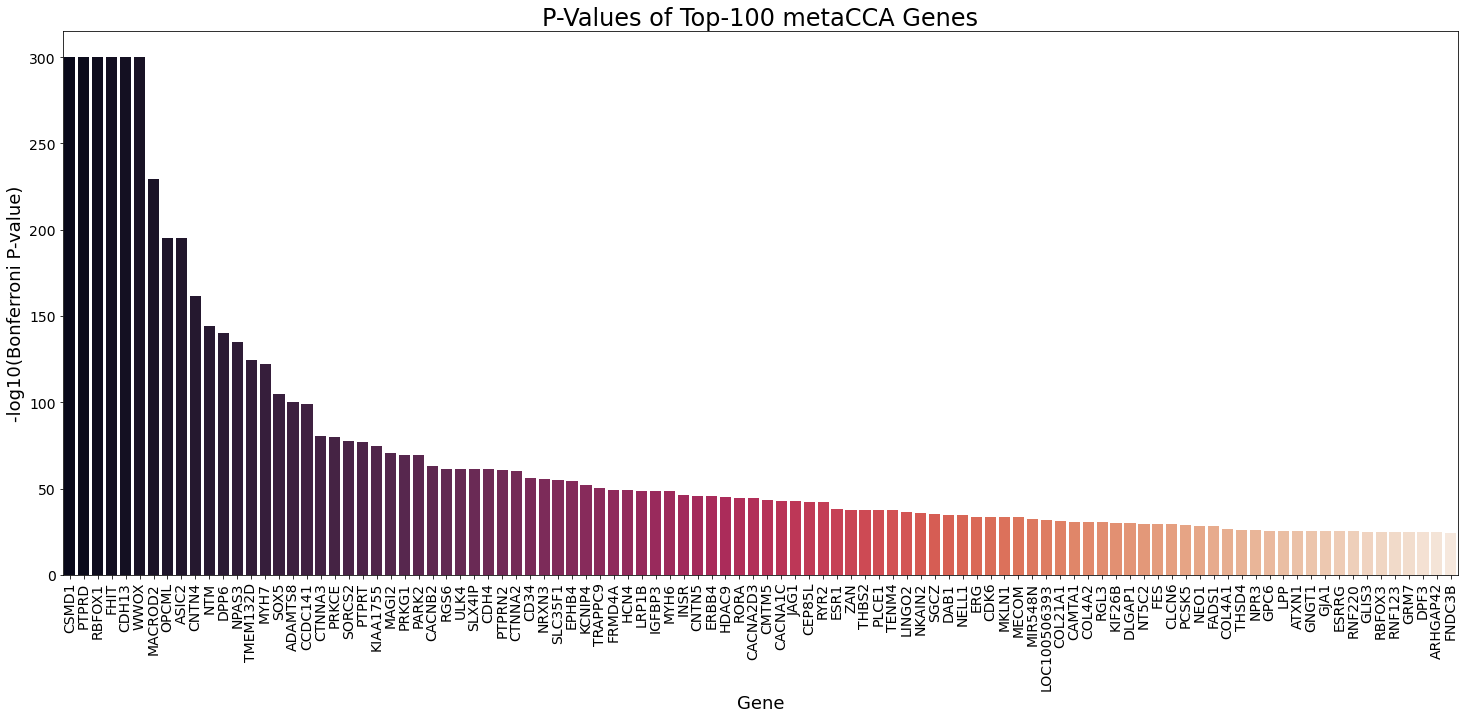

In [79]:
plot_df = all_df[all_df['genes'].isin(sig_df['genes'])].sort_values(['pbonf_minuslog10'], ascending=[False]).iloc[:100]

fig = plt.figure(figsize=(25,10))
sns.barplot(x='genes', y='pbonf_minuslog10', data=plot_df, palette='rocket')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gene", fontsize=18)
plt.ylabel("-log10(Bonferroni P-value)", fontsize=18)
plt.title("P-Values of Top-100 metaCCA Genes", fontsize=24)

Text(0.5, 1.0, 'Canonical Correaltion of Top-100 metaCCA Genes')

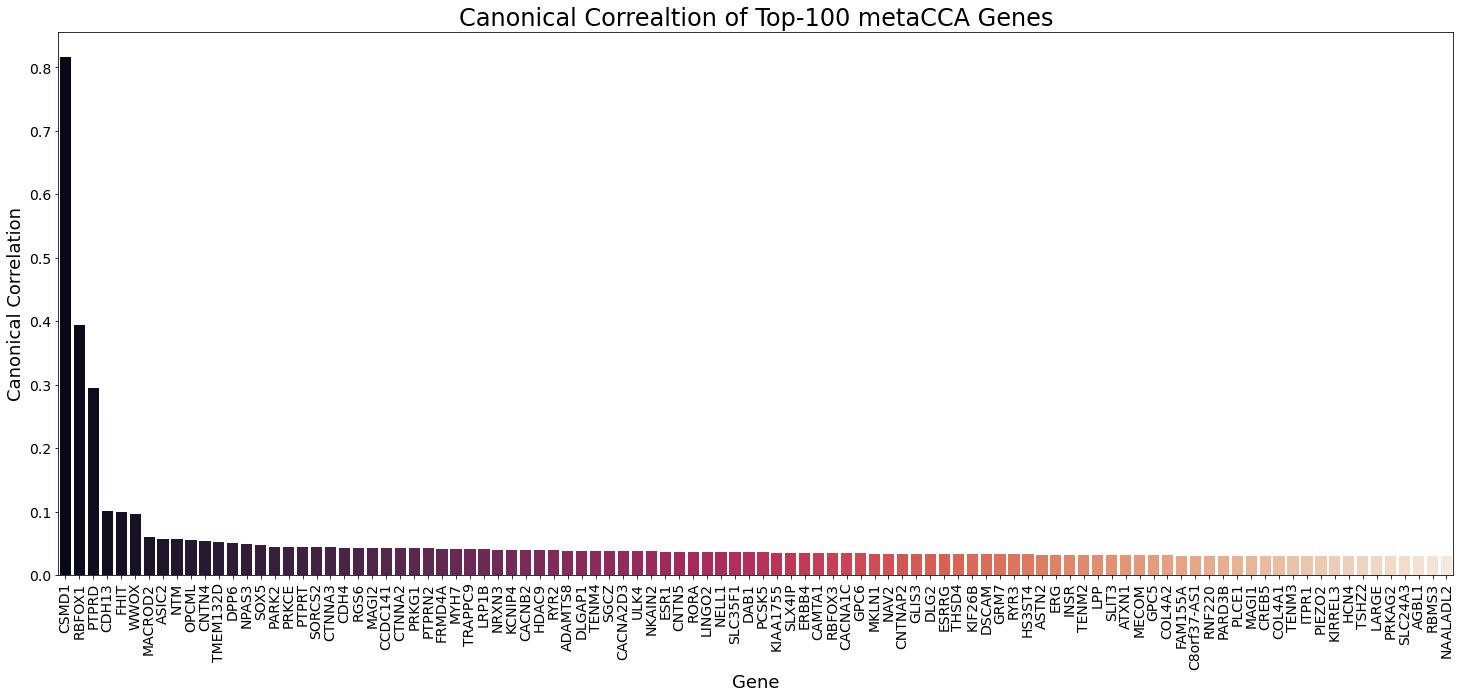

In [80]:
plot_df = all_df[all_df['genes'].isin(sig_df['genes'])].sort_values(['r_1'], ascending=[False]).iloc[:100]

fig = plt.figure(figsize=(25,10))
sns.barplot(x='genes', y='r_1', data=plot_df, palette='rocket')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gene", fontsize=18)
plt.ylabel("Canonical Correlation", fontsize=18)
plt.title("Canonical Correaltion of Top-100 metaCCA Genes", fontsize=24)

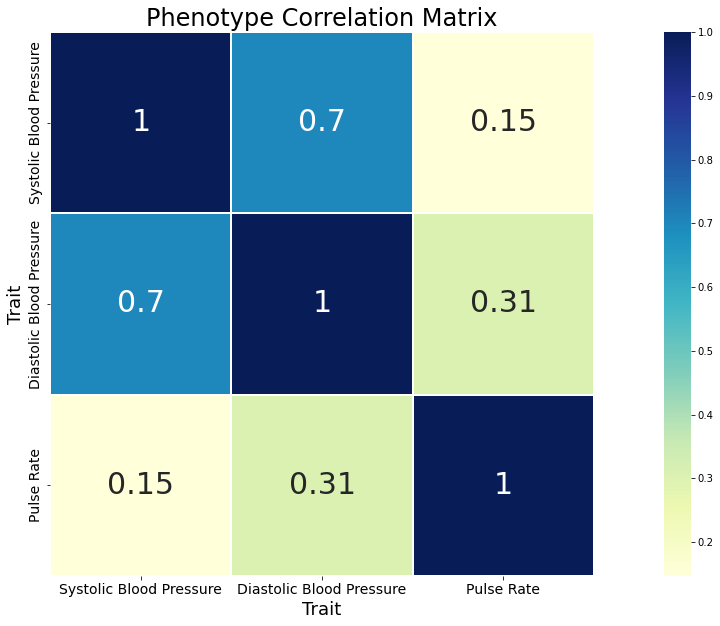

In [53]:
df = pd.read_csv("./data/processed/syy_full_study_1.txt", delimiter="\t")
df.rename(columns={'sys':'Systolic Blood Pressure', 'dia':'Diastolic Blood Pressure', 'pul':'Pulse Rate'}, inplace=True)
df['Trait'] = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Pulse Rate']
df.set_index("Trait", inplace=True)

fig = plt.figure(figsize=(25, 10))
sns.heatmap(df, square=True, cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":30})
plt.title("Phenotype Correlation Matrix", fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Trait", fontsize=18)
plt.ylabel("Trait", fontsize=18)

plt.show()

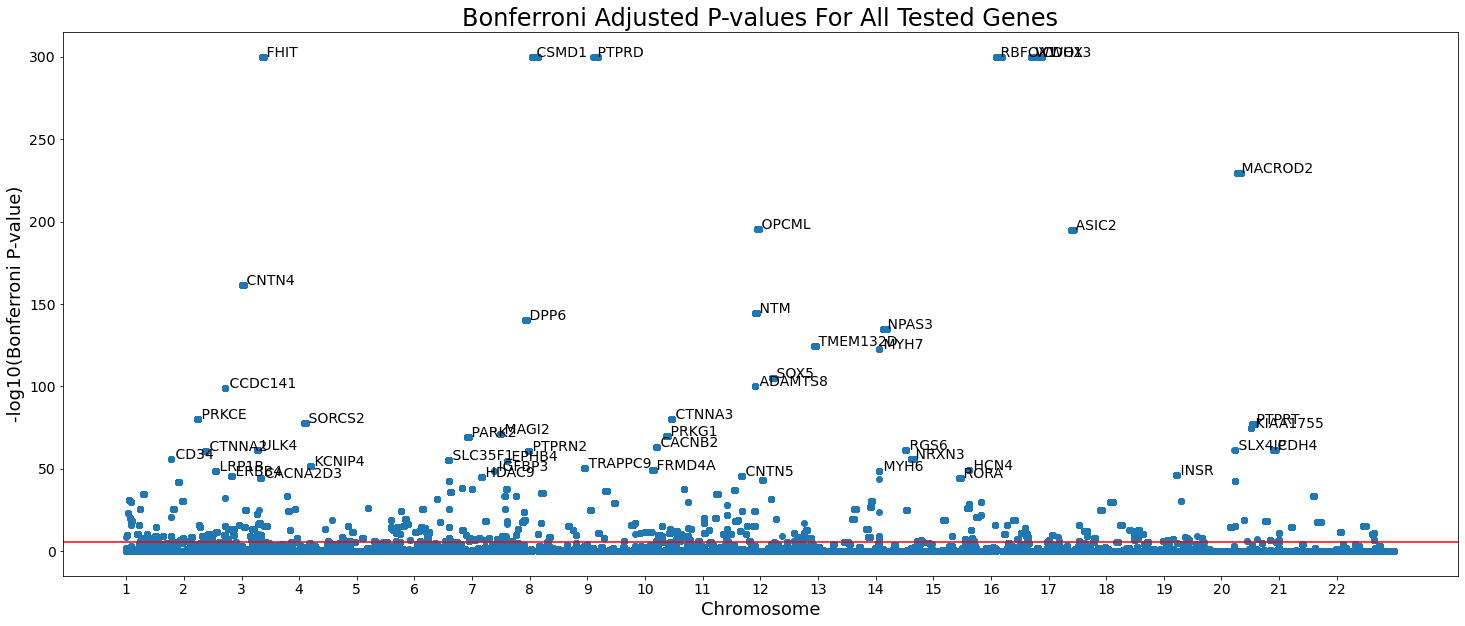

In [86]:
plot_df = flatten_snps(all_df, pdf)

fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(plot_df['plot_chr'], plot_df['pbonf_minuslog10'])
ax.axhline(-np.log10(0.05/all_df.shape[0]), color='red')
plt.yticks(fontsize=14)
plt.xticks(range(1, 23), fontsize=14)
plt.xlabel("Chromosome", fontsize=18)
plt.ylabel("-log10(Bonferroni P-value)", fontsize=18)
plt.title("Bonferroni Adjusted P-values For All Tested Genes", size=24)

# gene labelling
display_top_gene_names = 50
sig_genes = set(all_df.sort_values(by='pBonf').iloc[:display_top_gene_names]['genes'])
an_df = plot_df[plot_df['gene'].isin(sig_genes)]

for i in range(an_df.shape[0]):
    if an_df.iloc[i]['gene'] in sig_genes:
        ax.annotate(" "*1+an_df.iloc[i]['gene'], (an_df.iloc[i]['plot_chr'], an_df.iloc[i]['pbonf_minuslog10']), fontsize=14)
        sig_genes.remove(an_df.iloc[i]['gene'])

plt.show()
        

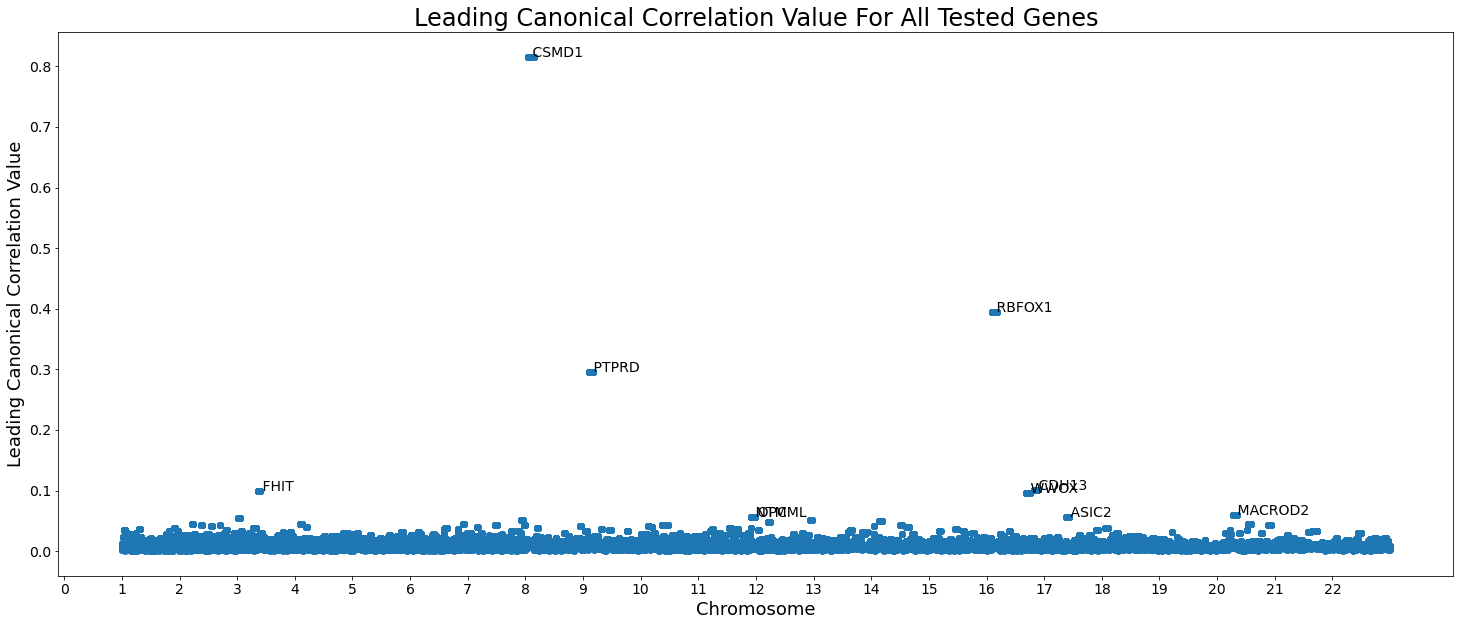

In [33]:
plot_df = flatten_snps(all_df, pdf)

fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(plot_df['plot_chr'], plot_df['r_1'])
plt.yticks(fontsize=14)
plt.xticks(list(range(1, 23)), fontsize=14)
plt.xlabel("Chromosome", fontsize=18)
plt.ylabel("Leading Canonical Correlation Value", fontsize=18)
plt.title("Leading Canonical Correlation Value For All Tested Genes", size=24)

# gene labelling
display_top_gene_names = 10
sig_genes = set(all_df.sort_values(by='r_1', ascending=False).iloc[:display_top_gene_names]['genes'])
an_df = plot_df[plot_df['gene'].isin(sig_genes)]

for i in range(an_df.shape[0]):
    if an_df.iloc[i]['gene'] in sig_genes:
        ax.annotate(" "*1+an_df.iloc[i]['gene'], (an_df.iloc[i]['plot_chr'], an_df.iloc[i]['r_1']), fontsize=14)
        sig_genes.remove(an_df.iloc[i]['gene'])

plt.show()

In [34]:
all_df[all_df['pBonf'] < (0.05)].sort_values(by='r_1', ascending=False)[['chrom', 'genes', 'r_1', 'pBonf', 'pbonf_minuslog10']].iloc[:100]

,chrom,genes,r_1,pBonf,pbonf_minuslog10
6486,8,CSMD1,0.815643,1.000000e-300,300.000000
11308,16,RBFOX1,0.394163,1.000000e-300,300.000000
7069,9,PTPRD,0.295391,1.000000e-300,300.000000
11310,16,CDH13,0.101434,1.000000e-300,300.000000
2649,3,FHIT,0.099205,1.000000e-300,300.000000
...,...,...,...,...,...
5749,7,PRKAG2,0.030122,1.909026e-19,18.719188
14159,20,SLC24A3,0.030072,1.227302e-19,18.911049
10840,15,AGBL1,0.029998,3.632733e-21,20.439767
2664,3,RBMS3,0.029978,3.441727e-14,13.463224


In [104]:
sig_df['r_1'].agg(['min', 'max', 'count']).to_frame().T

,min,max,count
r_1,0.007981,0.815643,860.0


In [36]:
snps = list(set(functools.reduce(lambda a,b: a+b, sig_df['SNPs'].apply(lambda x: x.split("_")))))
len(snps)

45343

In [43]:
sig_df['r_1'].agg(['min', 'max'])

min    0.006981
max    0.713497
Name: r_1, dtype: float64

In [105]:
os.listdir("./data/analysis/")

['GO_Biological_Process_2021_table.txt',
 '.DS_Store',
 'GO_Molecular_Function_2021_table.txt',
 'images',
 'WikiPathway_2021_Human_table.txt',
 'GO_Cellular_Component_2021_table.txt']

In [107]:
go_b = pd.read_csv("./data/analysis/GO_Biological_Process_2021_table.txt", delimiter="\t")
go_m = pd.read_csv("./data/analysis/GO_Molecular_Function_2021_table.txt", delimiter="\t")
go_c = pd.read_csv("./data/analysis/GO_Cellular_Component_2021_table.txt", delimiter="\t")
wik = pd.read_csv("./data/analysis/WikiPathway_2021_Human_table.txt", delimiter="\t")

In [129]:
import networkx as nx

def expand_on_genes(df):
    res = {'genes':[], 'term':[]}
    for i in range(df.shape[0]):
        genes = (df.iloc[i]['Genes'].split(";"))
        res['genes'].extend(genes)
        res['term'].extend([df.iloc[i]['Term']]*len(genes))
    
    return pd.DataFrame(res)

def plot_network(df):
    plot_df = expand_on_genes(df)
    
    fig = plt.figure(figsize=(25, 10))
    graph = nx.from_pandas_edgelist(df=plot_df, source='genes', target='term')

    nx.draw_circular(graph, 
                     edge_color='black', 
                     width=3, linewidths=1,
                     #node_size=15000, 
                     node_color='pink', 
                     alpha=1,
                     with_labels=True, 
                     font_size=14)

    plt.title("Test\n", size=24)
    plt.axis('off')
    plt.show()

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}
\hline
Phenotype                    & SNP Count    & Population  \\
\hline
Pulse Rate                    & $10,534,620$ & European \\
\hline
Diastolic Blood Pressure      & $10,534,620$ & European \\
\hline
Systolic Blood Pressure       & $10,534,620$ & European \\
\hline
\end{tabular}
\caption{Summary of GWAS datasets. Sourced from atlas website\cite{atlas_catalog}}
\label{gwas_summary_table}
\end{table}

In [147]:
def gene_print(x):
#     print("\hline")
    print("\item", x['Term']+" - "+ ", ".join(x['Genes'].split(";")))

go_b.iloc[:5][['Term', 'Genes']].apply(gene_print, axis=1)
pass

\item cardiac muscle cell action potential (GO:0086001) - HCN4, SCN10A, KCND3, CACNA2D1, KCNQ1, PKP2, CACNA1D, ANK2, CACNA1C, SCN5A, ATP1B1, FGF12
\item regulation of heart rate by cardiac conduction (GO:0086091) - HCN4, DSP, KCNJ5, KCND3, CACNA2D1, CACNA1D, ANK2, CACNA1C, CACNB2, KCNQ1, PKP2, CTNNA3, SCN5A
\item nervous system development (GO:0007399) - CHRM2, HDAC4, YAP1, NRXN1, WDR62, SPG7, TRAK1, KALRN, NPAS2, FGF5, ATXN1, RELN, EFNB3, CDH2, BTBD1, ERBB4, DNER, DPF3, EP300, SOX6, ASIC2, KIRREL3, FARP1, RBFOX1, MBNL1, MEF2C, SZT2, JAG1, RBFOX3, DSCAM, CNTN6, ZBTB16, FN1, FBXL17, CRIM1, NRG1, NAV2, NGF, ARHGAP26, DNM3, NELL1, SDK1, DLG4, CNTN4, MET, FGF12, SDK2, SHANK2
\item heart development (GO:0007507) - BMPR2, GATA4, CACNA1C, PCSK5, HDAC9, ERBB4, PLCE1, MEF2D, EPHB4, MYBPC3, MEF2C, MKKS, INSR, FN1, TSC2, SGCZ, TGFBR3, DLC1, PKP2, RBM20, ZFPM2, ZFPM1, FGF12, MYH6, FBN1, MYH7
\item regulation of heart contraction (GO:0008016) - RYR1, HCN4, RYR2, NPR1, CELF2, PDE4D, TPM1, ITPR1, ITP

In [148]:
go_m.iloc[:5][['Term', 'Genes']].apply(gene_print, axis=1)
pass

\item DNA-binding transcription factor binding (GO:0140297) - YAP1, HDAC4, SPI1, GATA4, CXXC5, HDAC9, RELA, PRDM16, EP300, MEF2D, GTF2I, TCF7L2, MEF2C, CREBBP, MKKS, SMAD3, PRRX1, NFATC1, WWP2, RBL2, DGKQ, MAP3K10, ZFPM2, TP53, ZFPM1
\item GTPase activator activity (GO:0005096) - DOCK4, DOCK8, ITSN1, RASGRF1, ASAP2, ARHGAP15, KALRN, PREX1, ABR, FGD4, FGD5, ARHGAP42, PLCE1, SBF2, RGS6, RGS7, VAV3, FARP1, EIF2B4, TSC2, ARHGEF18, MYO9B, ARHGAP27, ARHGAP26, ARHGAP24, ARFGAP2, ARHGAP10, TBC1D1, DLC1, RIN3, RGL1, PLCB1, DOCK1
\item voltage-gated calcium channel activity involved in cardiac muscle cell action potential (GO:0086007) - CACNB2, CACNA2D1, CACNA1D, CACNA1C
\item RNA polymerase II-specific DNA-binding transcription factor binding (GO:0061629) - PTPRT, HDAC4, BCAS3, TCF7L2, CREBBP, MKKS, SPI1, SMAD3, PRRX1, GATA4, NFATC1, WWP2, ACTN4, RELA, NCOR2, RBL2, EP300, TACC2, ZFPM2, TP53, ZFPM1, GTF2I
\item guanyl-nucleotide exchange factor activity (GO:0005085) - VAV3, EIF2B4, FARP1, DOCK4,

In [149]:
go_c.iloc[:5][['Term', 'Genes']].apply(gene_print, axis=1)
pass

\item intercalated disc (GO:0014704) - DSP, GJA1, CDH2, NRAP, PKP2, CTNNA3, ANK2, SCN5A, ANK3, ATP1B1
\item neuron projection (GO:0043005) - CHRM2, CNTNAP2, APP, TENM2, TENM3, TENM4, RASGRF1, HTR4, IGF1R, SCGN, CDH2, GRM7, DNER, ANKS1A, EPHB4, KPNA1, KIRREL3, CHRNB1, PACRG, DSCAM, MAGI2, ANK2, ANK3, NGF, DNM3, SCN10A, PALLD, MAP1B, CDH13, RIN3, MAPT, SHANK2, SPTBN4, TRAK1, CRHR1, INPP5A, RELN, CTNNA2, CCDC141, MARK3, FARP1, HOMER2, WFS1, CNTN6, PLK2, INSR, DLG2, DLG4, STRN, CNTN4
\item calcium channel complex (GO:0034704) - RYR1, RYR2, CACNB2, TRPC4, CACNA2D1, PDE4D, CACNA2D3, CACNA1D, CACNA1C, RYR3
\item dendrite (GO:0030425) - CHRM2, CNTNAP2, TENM2, HTR4, TRAK1, SCGN, INPP5A, RELN, GRM7, DNER, MARK3, KPNA1, KIRREL3, FARP1, DSCAM, HOMER2, WFS1, INSR, PLK2, MAGI2, ANK3, NGF, DLG4, MAP1B, RIN3, STRN, MAPT
\item adherens junction (GO:0005912) - MAGI1, SPTBN4, JAG1, BMPR2, CTNND2, PTPRM, FRMD4A, PARD3B, ARVCF, CDH2, CCDC85A, CDH11, PKP2, FAT2, CTNNA3, CTNNA2, FERMT2


In [154]:
wik.sort_values(by='Adjusted P-value').iloc[:5][['Term', 'Genes']].apply(gene_print, axis=1)
pass

\item Calcium Regulation in the Cardiac Cell WP536 - CHRM2, RYR1, RYR2, ITPR1, CACNA1A, ITPR2, CACNA1D, CACNA1C, RYR3, GNGT1, GJA1, GNG7, RGS6, RGS7, KCNJ5, PRKCB, PRKCE, ATP1B3, PRKCA, ATP2B1, ATP1B1, GNAO1, PKIB, ADCY9, GNAS, GNB4
\item Pathways Regulating Hippo Signaling WP4540 - TCF7L2, TCF7L1, SMAD3, PRKCB, PRKCE, INSR, MST1, PRKAG2, PRKCA, EGFR, IGF1R, CDH4, LATS2, CDH2, PRKD3, CDH11, GNAS, CDH13, PLCB1, MET
\item Arrhythmogenic Right Ventricular Cardiomyopathy WP2118 - DSP, RYR2, TCF7L2, TCF7L1, ITGB5, CACNA2D1, CACNA2D3, CACNA1D, ACTN4, CACNA1C, CACNB2, GJA1, CDH2, PKP2, CTNNA3, CTNNA2, ITGA9
\item Myometrial relaxation and contraction pathways WP289 - RYR1, RYR2, PRKCB, NOS3, IGFBP3, PRKCE, PDE4D, ITPR1, ITPR2, PRKCA, CRHR1, RYR3, GNGT1, PKIB, GJA1, ADCY9, GNG7, PLCG2, GNAS, GNB4, RGS6, RGS7
\item Resistin as a regulator of inflammation WP4481 - AKT2, AKT3, ITPR1, PLCG2, PLCE1, MAPK1, PLCB1, PLCD3, RELA
